<a href="https://colab.research.google.com/github/Arcanjo04/Data_Science_Unimed/blob/main/PlanilhasExcelExterna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importando biblioteca
import pandas as pd


In [16]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")


In [17]:
df = pd.concat([df1,df2,df3,df4,df5])

In [18]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [19]:
#Ultimas 5 linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [20]:
#Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [21]:
#Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [22]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores faltantes**

In [23]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [24]:
#Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [25]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [26]:
df["Vendas"].mean()

122.61180089485458

In [27]:
df["Vendas"].fillna(0, inplace=True)

In [28]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(inplace=True)

**Criando colunas novas**

In [29]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [30]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [31]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [32]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [33]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [34]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [35]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [36]:
#nsmallest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [37]:
#Agrupando cidades
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [38]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**Trabalhando com datas**




In [39]:
# Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [40]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [41]:
df["Data"] = pd.to_datetime(df["Data"])

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
207,Salvador,2019-01-02,46.70,1036,2,93.40,2.0
31,Natal,2018-04-03,401.00,854,4,1604.00,4.0
238,Salvador,2019-01-03,139.64,1035,1,139.64,1.0
34,Aracaju,2018-01-01,38.25,1521,6,229.50,6.0
78,Salvador,2019-01-01,111.20,1036,3,333.60,3.0


**Visualizacao de dados**

In [43]:
df["LojaID"].value_counts(ascending=True)

1003     20
1521     21
853      26
1004     28
854      28
1523     29
852      29
1002     30
1005     30
981      31
980      36
1520     39
1522     41
982      44
983      65
1034     67
1037    101
1035    112
1036    117
Name: LojaID, dtype: int64

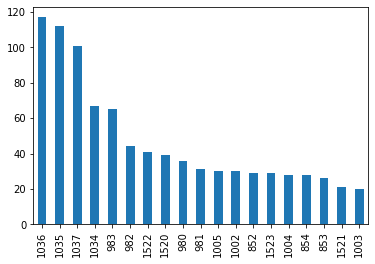

In [44]:
#Grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

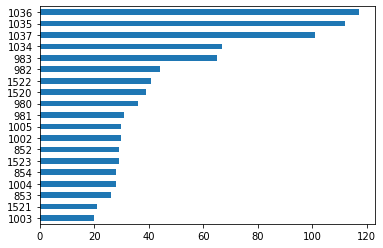

In [45]:
#Grafico de barras horizontal
df["LojaID"].value_counts(ascending=True).plot.barh();

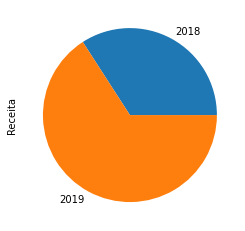

In [46]:
#Grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [47]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

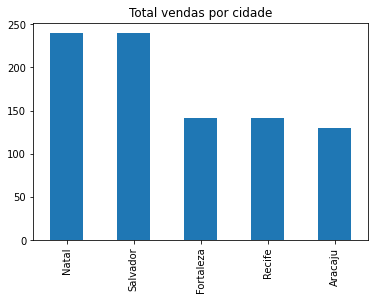

In [51]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade")

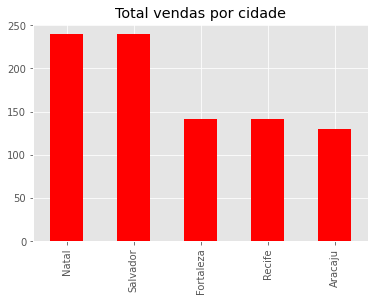

In [56]:
#Alterando cor
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por cidade", color="red")

In [54]:
#Alterando estilo
plt.style.use("ggplot")

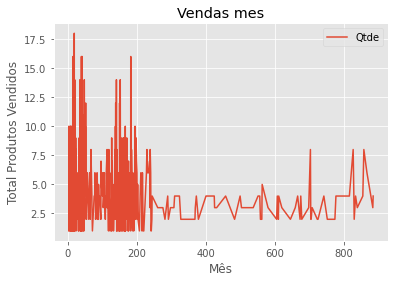

In [59]:
df.groupby(df["Vendas"])["Qtde"].sum().plot(title = "Vendas mes")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

In [61]:
df.groupby(df["Vendas"])["Qtde"].sum()

Vendas
3.01       7
3.10      10
3.34       1
3.39       6
3.49       4
          ..
856.00     4
859.00     8
868.00     6
885.00     3
886.00     4
Name: Qtde, Length: 679, dtype: int64

In [69]:
df_2018 = df[df["Receita"] == 2018]

In [76]:
#Total produtos vendidos por mês
df_2018.groupby(df_2019["Vendas"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()

NameError: ignored